In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("label_data.csv")
print(df)

    Accuracy  Avg Reaction Time  Label
0      100.0               1.49      2
1       99.0               2.80      2
2       68.4               2.31      0
3       83.6               2.63      1
4       88.7               1.93      1
5       82.5               1.74      1
6       61.3               1.27      0
7       58.3               2.15      0
8       65.7               1.48      0
9       76.3               1.82      0
10      97.3               1.79      2
11      93.0               1.73      2
12      98.2               2.65      2
13      84.3               2.13      1
14      77.6               1.34      0
15      84.5               1.45      1
16      89.4               1.56      1
17      91.2               1.30      2


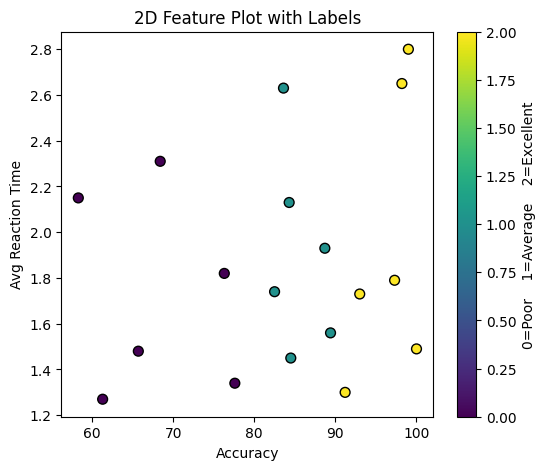

In [18]:
# X = 2 features, y = labels
X = df[["Accuracy", "Avg Reaction Time"]].values
y = df["Label"].values

plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=50, edgecolor="k")
plt.xlabel("Accuracy")
plt.ylabel("Avg Reaction Time")
plt.title("2D Feature Plot with Labels")
plt.colorbar(label="0=Poor    1=Average    2=Excellent")
plt.show()

In [19]:
features = {}


if "Accuracy" in df.columns:
    features["Accuracy Mean"] = df["Accuracy"].mean()
    features["Accuracy Std"] = df["Accuracy"].std()
    features["Accuracy Var"] = df["Accuracy"].var()
    features["Accuracy Min"] = df["Accuracy"].min()
    features["Accuracy Max"] = df["Accuracy"].max()
    features["Accuracy Median"] = df["Accuracy"].median()

if "Avg Reaction Time" in df.columns:
    features["Reaction Time Mean"] = df["Avg Reaction Time"].mean()
    features["Reaction Time Std"] = df["Avg Reaction Time"].std()
    features["Reaction Time Var"] = df["Avg Reaction Time"].var()
    features["Reaction Time Min"] = df["Avg Reaction Time"].min()
    features["Reaction Time Max"] = df["Avg Reaction Time"].max()
    features["Reaction Time Median"] = df["Avg Reaction Time"].median()

features_df = pd.DataFrame(list(features.items()), columns=["Feature", "Value"])
print(features_df)

                 Feature       Value
0          Accuracy Mean   83.294444
1           Accuracy Std   13.042215
2           Accuracy Var  170.099379
3           Accuracy Min   58.300000
4           Accuracy Max  100.000000
5        Accuracy Median   84.400000
6     Reaction Time Mean    1.865000
7      Reaction Time Std    0.483483
8      Reaction Time Var    0.233756
9      Reaction Time Min    1.270000
10     Reaction Time Max    2.800000
11  Reaction Time Median    1.765000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.00      0.00      0.00         6
           2       0.67      1.00      0.80         6

    accuracy                           0.56        18
   macro avg       0.37      0.56      0.44        18
weighted avg       0.37      0.56      0.44        18



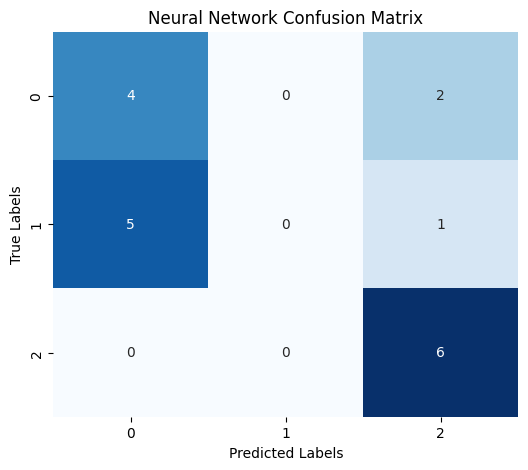

In [20]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = to_categorical(y, num_classes=3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


nn_model = Sequential([
    Input(shape=(2,)),        
    Dense(8, activation="relu"),
    Dense(6, activation="relu"),
    Dense(3, activation="softmax")
])

nn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

nn_model.fit(X_train, y_train, epochs=50, verbose=0)

predictions = nn_model.predict(X)                  # output probabilities
predicted_classes = np.argmax(predictions, axis=1)

# True labels
y_true = df["Label"].values

# Predicted labels
y_pred = predicted_classes

report = classification_report(y_true, y_pred, zero_division=0)
print(report)


cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Neural Network Confusion Matrix')
plt.show()

--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



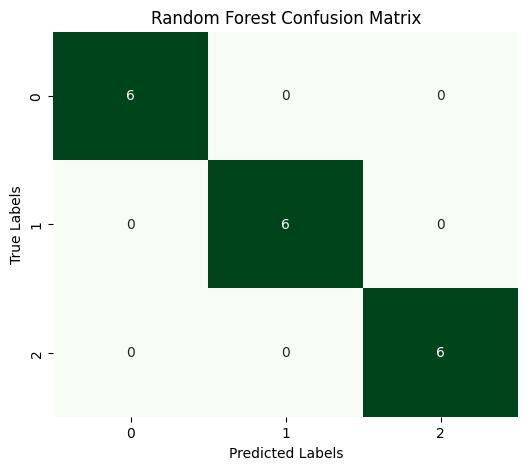

In [23]:
y_int = df["Label"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y_int)  


rf_pred = rf_model.predict(X_scaled)


print("--- Random Forest ---")
print(classification_report(y_int, rf_pred, zero_division=0))

cm_rf = confusion_matrix(y_int, rf_pred)


plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()


--- XGBoost ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



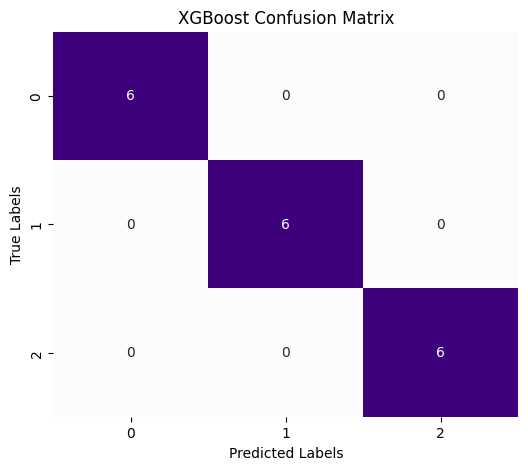

In [24]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xgb_model.fit(X_scaled, y_int)


y_pred = xgb_model.predict(X_scaled)


print("--- XGBoost ---")
print(classification_report(y_int, y_pred, zero_division=0))


cm_xgb = confusion_matrix(y_int, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix')
plt.show()
